# Lesson 26: Introduction to Numpy and Scipy

(c) 2018 Justin Bois. With the exception of pasted graphics, where the source is noted, this work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

This document was prepared at [Caltech](http://www.caltech.edu) with financial support from the [Donna and Benjamin M. Rosen Bioengineering Center](http://rosen.caltech.edu).

<img src="caltech_rosen.png">

*This tutorial was generated from a Jupyter notebook.  You can download the notebook [here](l26_intro_to_numpy_and_scipy.ipynb).*

<br /> <br />

In [1]:
import numpy as np
import pandas as pd

# We'll demo a bit of Scipy
import scipy.special

import altair as alt

import bootcamp_utils

In this lesson, you will learn about [**NumPy**](http://www.numpy.org), arguably *the* most important package for scientific computing, and SciPy, a package containing lots of goodies for scientific computing, like special functions and numerical integrators.  

## A very brief introduction to NumPy arrays

The central object for NumPy and SciPy is the `ndarray`, commonly referred to as a "NumPy array."  This is an array object that is convenient for scientific computing.  We will go over it in depth in the next lesson, but for now, let's just create some NumPy arrays and see how operators work on them.

Just like with type conversions with lists, tuples, and other data types we've looked at, we can convert a list to a NumPy array using

    np.array()
    
Note that above we imported the NumPy package "**`as`** `np`".  This is for convenience; it allow us to use `np` as a prefix instead of `numpy`.  NumPy is in **very** widespread use, and the convention is to use the `np` abbreviation.

In [2]:
# Create a NumPy array from a list
my_ar = np.array([1, 2, 3, 4])

# Look at it
my_ar

array([1, 2, 3, 4])

We see that the list has been converted, and it is explicitly shown as an array.  It has several attributes and lots of methods.  The most important attributes are probably the data type of its elements and the shape of the array.

In [3]:
# The data type of stored entries
my_ar.dtype

dtype('int64')

In [4]:
# The shape of the array
my_ar.shape

(4,)

There are also lots of methods.  The one I use most often is `astype()`, which converts the data type of the array.

In [5]:
my_ar.astype(float)

array([1., 2., 3., 4.])

There are many others. For example, we can compute summary statistics about the entries in the array.

In [6]:
print(my_ar.max())
print(my_ar.min())
print(my_ar.sum())
print(my_ar.mean())
print(my_ar.std())

4
1
10
2.5
1.118033988749895


Importantly, NumPy arrays can be arguments to NumPy functions. In this case, these functions do the same operations as the methods we just looked at.

In [7]:
print(np.max(my_ar))
print(np.min(my_ar))
print(np.sum(my_ar))
print(np.mean(my_ar))
print(np.std(my_ar))

4
1
10
2.5
1.118033988749895


## Other ways to make NumPy arrays

There are many other ways to make NumPy arrays besides just converting lists or tuples.  Below are some examples.

In [8]:
# How long our arrays will be
n = 10

# Make a NumPy array of length n filled with zeros
np.zeros(n)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
# Make a NumPy array of length n filled with ones
np.ones(n)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
# Make an empty NumPy array of length n without initializing entries
# (while it initially holds whatever values were previously in the memory
# locations assigned, ones will be displayed)
np.empty(n)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
# Make a NumPy array filled with zeros the same shape as another NumPy array
my_ar = np.array([[1, 2], [3, 4]])
np.zeros_like(my_ar)

array([[0, 0],
       [0, 0]])

## Extracting Numpy arrays from Pandas data frames

NumPy has a primitive function for loading in data from text files, `np.loadtxt()`, but with Pandas's `read_csv()`, there is really no reason to ever use it. Instead, we may sometimes wish to extract Numpy arrays out of Pandas data frames (which is almost always for speed reasons, which we will see when we do hacker stats).

As it is always more fun to work with a real biological application, we will populate our NumPy arrays with data. In their 2011 [paper in PLoS ONE](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0025840), Harvey and Orbidans measured the cross-sectional area of *C. elegans* eggs that came from mothers who had a high concentration of food and from mothers of a low concentration of food.  I digitized the data from their plots, and they are available in the file `data/c_elegans_egg_xa.csv` in the bootcamp repository.

In [12]:
df = pd.read_csv('data/c_elegans_egg_xa.csv', comment='#')

# Take a look
df.head()

,food,area (sq. um)
0,high,1683
1,high,2061
2,high,1792
3,high,1852
4,high,2091


It's a good idea, since we're using Altair, to change the column name for the area to exclude the dot.

In [13]:
df = df.rename(columns={'area (sq. um)': 'area (sq um)'})

Just for fun, let's make a quick plot. We can do this because we went high level first.

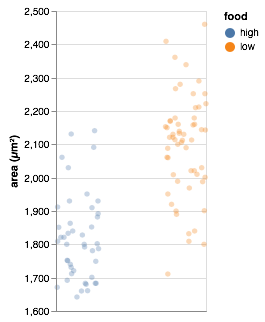

In [14]:
bootcamp_utils.altair_jitter(df,
                             encode_x=alt.X('food:N'), 
                             encode_y=alt.Y('area (sq um):Q',
                                            title='area (µm²)', 
                                            scale=alt.Scale(zero=False)),
                             height=300,
                             width=150).configure_point(filled=True,
                                                        opacity=0.3)

It looks like worms that eat more food have smaller eggs.

If we wanted to extract the measurements for worms with high food, we can do so using Boolean indexing in Pandas.

In [15]:
xa_high = df.loc[df['food']=='high', 'area (sq um)']

# Take a look at the data type
type(xa_high)

pandas.core.series.Series

The result is a Pandas `Series`, which is kind of like a single-column `DataFrame`. If we want to convert this to a Numpy array, we use the `.values` attribute.

In [16]:
xa_high = df.loc[df['food']=='high', 'area (sq um)'].values

type(xa_high)

numpy.ndarray

Now we have a Numpy array! Let's pull out the low food cross sectional areas as well.

In [17]:
xa_low = df.loc[df['food']=='low', 'area (sq um)'].values

And now let's take a look at these arrays.

In [18]:
xa_high

array([1683, 2061, 1792, 1852, 2091, 1781, 1912, 1802, 1751, 1731, 1892,
       1951, 1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833, 1683,
       1671, 1680, 1692, 1800, 1821, 1882, 1642, 1749, 1712, 1661, 1701,
       2141, 1863, 1752, 1740, 1721, 1660, 1930, 2030, 1851, 2131, 1828])

In [19]:
xa_low

array([1840, 2090, 2169, 1988, 2212, 2339, 1989, 2144, 2290, 1920, 2280,
       1809, 2158, 1800, 2133, 2060, 2160, 2001, 2030, 2088, 1951, 2460,
       2021, 2010, 2139, 2160, 2106, 2171, 2113, 2179, 1890, 2179, 2021,
       1969, 2150, 1900, 2267, 1711, 1901, 2114, 2112, 2361, 2130, 2061,
       2121, 1832, 2210, 2130, 2153, 2009, 2100, 2252, 2143, 2252, 2222,
       2121, 2409])

We will use these arrays as examples to learn about Numpy arrays.

## Slicing NumPy arrays

We can slice NumPy arrays like lists and tuples.  Here are a few examples.

In [20]:
# Reversed array
xa_high[::-1]

array([1828, 2131, 1851, 2030, 1930, 1660, 1721, 1740, 1752, 1863, 2141,
       1701, 1661, 1712, 1749, 1642, 1882, 1821, 1800, 1692, 1680, 1671,
       1683, 1833, 1800, 1930, 1910, 1821, 1840, 1787, 1683, 1809, 1951,
       1892, 1731, 1751, 1802, 1912, 1781, 2091, 1852, 1792, 2061, 1683])

In [21]:
# Every 5th element, starting at index 3
xa_high[3::5]

array([1852, 1751, 1683, 1930, 1680, 1642, 2141, 1660, 1828])

In [22]:
# Entries 10 to 20
xa_high[10:21]

array([1892, 1951, 1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833])

### Fancy indexing

NumPy arrays also allow **fancy indexing**, where we can slice out specific values.  For example, say we wanted indices 1, 19, and 6 (in that order) from `xa_high`.  We just index with a list of the indices we want.

In [23]:
xa_high[[1, 19, 6]]

array([2061, 1800, 1912])

Instead of a list, we could also use a NumPy array.

In [24]:
xa_high[np.array([1, 19, 6])]

array([2061, 1800, 1912])

As a very nice feature, we can use Boolean indexing with Numpy arrays, just like with Pandas using `.loc`. Say we only want the egg cross sectional areas that are greater than 2000 µm$^2$.

In [25]:
# Just slice out the big ones
xa_high[xa_high > 2000]

array([2061, 2091, 2141, 2030, 2131])

If we want to know the indices where the values are high, we can use the `np.where()` function.

In [26]:
np.where(xa_high > 2000)

(array([ 1,  4, 33, 40, 42]),)

## NumPy arrays are mutable

Yes, NumPy arrays are mutable.  Let's look at some consequences.

In [27]:
# Make an array
my_ar = np.array([1, 2, 3, 4])

# Change an element
my_ar[2] = 6

# See the result
my_ar

array([1, 2, 6, 4])

Now, let's try working attaching another variable to the NumPy array.

In [28]:
# Attach a new variable
my_ar2 = my_ar

# Set an entry using the new variable
my_ar2[3] = 9

# Does the original change? (yes.)
my_ar

array([1, 2, 6, 9])

Let's see how messing with NumPy in functions affects things.

In [29]:
# Re-instantiate my_ar
my_ar = np.array([1, 2, 3, 4]).astype(float)

# Function to normalize x (note that /= works with mutable objects)
def normalize(x):
    x /= np.sum(x)

# Pass it through a function
normalize(my_ar)

# Is it normalized even though we didn't return anything? (Yes.)
my_ar

array([0.1, 0.2, 0.3, 0.4])

So, be careful when writing functions.  What you do to your NumPy array inside the function will happen outside of the function as well.

### Slices of NumPy arrays are **views**, not copies

A very important distinction between NumPy arrays and lists is that slices of NumPy arrays are **views** into the original NumPy array, NOT copies.

In [30]:
# Make list and array
my_list = [1, 2, 3, 4]
my_ar = np.array(my_list)

# Slice out of each
my_list_slice = my_list[1:-1]
my_ar_slice = my_ar[1:-1]

# Mess with the slices
my_list_slice[0] = 9
my_ar_slice[0] = 9

# Look at originals
print(my_list)
print(my_ar)

[1, 2, 3, 4]
[1 9 3 4]


Messing with an element of a slice of a NumPy array messes with that element in the original!  This is not the case with lists.  Let's issue a warning.

<div class="alert alert-danger">
<center>Slices of NumPy arrays are **views**, not copies.</center>
</div>

Fortunately, you can make a copy of an array using the `np.copy()` function.

In [31]:
# Make a copy
xa_high_copy = np.copy(xa_high)

# Mess with an entry
xa_high_copy[10] = 2000

# Check equality
np.allclose(xa_high, xa_high_copy)

False

So, messing with an entry in the copy did not affect the original.

## Indexing 2D NumPy arrays

NumPy arrays need not be one-dimensional.  We'll create a two-dimensional NumPy array by reshaping our `xa_high` array from having shape `(44,)` to having shape `(11, 4)`.  That is, it will become an array with 11 rows and 4 columns.

In [32]:
# New 2D array using the reshape() method
my_ar = xa_high.reshape((11, 4))

# Look at it
my_ar

array([[1683, 2061, 1792, 1852],
       [2091, 1781, 1912, 1802],
       [1751, 1731, 1892, 1951],
       [1809, 1683, 1787, 1840],
       [1821, 1910, 1930, 1800],
       [1833, 1683, 1671, 1680],
       [1692, 1800, 1821, 1882],
       [1642, 1749, 1712, 1661],
       [1701, 2141, 1863, 1752],
       [1740, 1721, 1660, 1930],
       [2030, 1851, 2131, 1828]])

Notice that it is represented as an array made out of a list of lists.  If we had a list of lists, we would index it like this:

    list_of_lists[i][j]

In [33]:
# Make list of lists
list_of_lists = [[1, 2], [3, 4]]

# Pull out value in first row, second column
list_of_lists[0][1]

2

Though this will work with NumPy arrays, this is *not* how NumPy arrays are indexed.  They are indexed much more conveniently.

In [34]:
my_ar[0,1]

2061

We essentially have a tuple in the indexing brackets.  Now, say we wanted the second row (indexing starting at 0).

In [35]:
my_ar[2,:]

array([1751, 1731, 1892, 1951])

We can use Boolean indexing as before.

In [36]:
my_ar[my_ar > 2000]

array([2061, 2091, 2141, 2030, 2131])

Note that this gives a one-dimensional list of the entries greater than 2000. If we wanted indices where this is the case, we can again use `np.where()`.

In [37]:
np.where(my_ar > 2000)

(array([ 0,  1,  8, 10, 10]), array([1, 0, 1, 0, 2]))

This tuple of NumPy arrays is how we would index using fancy indexing to pull those values out using fancy indexing.

In [38]:
my_ar[(np.array([ 0,  1,  8, 10, 10]), np.array([1, 0, 1, 0, 2]))]

array([2061, 2091, 2141, 2030, 2131])

NumPy arrays can be of arbitrary integer dimension, and these principles extrapolate to 3D, 4D, etc., arrays.

## Concatenating arrays

Let's say we want to study all cross sectional areas and don't care if the mother was well-fed or not.  We would want to concatenate our arrays.  The `np.concatenate()` function accomplishes this.  We simply have to pass it a tuple containing the NumPy arrays we want to concatenate.

In [39]:
combined = np.concatenate((xa_high, xa_low))

# Look at it
combined

array([1683, 2061, 1792, 1852, 2091, 1781, 1912, 1802, 1751, 1731, 1892,
       1951, 1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833, 1683,
       1671, 1680, 1692, 1800, 1821, 1882, 1642, 1749, 1712, 1661, 1701,
       2141, 1863, 1752, 1740, 1721, 1660, 1930, 2030, 1851, 2131, 1828,
       1840, 2090, 2169, 1988, 2212, 2339, 1989, 2144, 2290, 1920, 2280,
       1809, 2158, 1800, 2133, 2060, 2160, 2001, 2030, 2088, 1951, 2460,
       2021, 2010, 2139, 2160, 2106, 2171, 2113, 2179, 1890, 2179, 2021,
       1969, 2150, 1900, 2267, 1711, 1901, 2114, 2112, 2361, 2130, 2061,
       2121, 1832, 2210, 2130, 2153, 2009, 2100, 2252, 2143, 2252, 2222,
       2121, 2409])

## NumPy has useful mathematical functions

So far, we have not done much mathematics with Python.  We have done some adding and division, but nothing like computing a logarithm or cosine.  The NumPy functions also work elementwise on the arrays when it is intuitive to do so (just like we have seen in Pandas `DataFrame`s). That is, they apply the function to each entry in the array. Check it out (even though exponentiating cross sectional areas is nonsensical).

In [40]:
# Exponential
np.exp(xa_high/1000)

array([5.38167681, 7.8538197 , 6.00144336, 6.37255189, 8.09300412,
       5.93578924, 6.76660849, 6.06175887, 5.76036016, 5.64629738,
       6.63262067, 7.03571978, 6.10434004, 5.38167681, 5.97151103,
       6.29653826, 6.1780334 , 6.7530888 , 6.88951024, 6.04964746,
       6.2526164 , 5.38167681, 5.31748262, 5.36555597, 5.43033051,
       6.04964746, 6.1780334 , 6.56662499, 5.16549017, 5.74885095,
       5.54003047, 5.26457279, 5.47942408, 8.50794132, 6.44303692,
       5.7661234 , 5.69734342, 5.59011579, 5.25931084, 6.88951024,
       7.61408636, 6.36618252, 8.42328589, 6.22143134])

In [41]:
# Cosine
np.cos(xa_high)

array([ 0.62656192,  0.9933696 ,  0.27501843,  0.03112568,  0.26681725,
       -0.96021239, -0.33430744,  0.29228295, -0.42404251, -0.99984597,
        0.72399324, -0.99748325,  0.84865001,  0.62656192, -0.84393482,
        0.56257847,  0.43231386,  0.99610114,  0.48702972, -0.99122275,
       -0.11903049,  0.62656192,  0.94691648, -0.73027654, -0.24968607,
       -0.99122275,  0.43231386, -0.98275172, -0.49500319, -0.64703425,
       -0.98592179, -0.61963892, -0.17156886,  0.00460656, -0.99936794,
        0.53296056,  0.90375673,  0.82939405,  0.3256673 ,  0.48702972,
        0.86222727, -0.824246  ,  0.5401501 ,  0.91834245])

In [42]:
# Square root
np.sqrt(xa_high)

array([41.02438299, 45.39823785, 42.33202098, 43.03486958, 45.72745346,
       42.20189569, 43.72642222, 42.44997055, 41.84495191, 41.60528813,
       43.49712634, 44.17012565, 42.53234064, 41.02438299, 42.27292278,
       42.89522118, 42.67317659, 43.70354677, 43.93176527, 42.42640687,
       42.81354926, 41.02438299, 40.87786687, 40.98780306, 41.1339276 ,
       42.42640687, 42.67317659, 43.38202393, 40.52159918, 41.82104733,
       41.37632173, 40.75536774, 41.24318125, 46.27094121, 43.16248371,
       41.85689907, 41.71330723, 41.48493703, 40.74309757, 43.93176527,
       45.0555213 , 43.02324953, 46.16275555, 42.75511665])

We can even do some matrix operations (which are obviously not done elementwise), like dot products.

In [43]:
np.dot(xa_high/1000, xa_high/1000)

146.360195

NumPy also has useful attributes, like `np.pi`.

In [44]:
np.pi

3.141592653589793

## SciPy has even more useful functions (in modules)

SciPy actually began life as a library of special functions that operate on NumPy arrays. For example, we can compute an error function using the `scipy.special` module, which contains lots of special functions.  Note that you often have to individually import the SciPy module you want to use, for example with
   
    import scipy.special

In [45]:
scipy.special.erf(xa_high/2000)

array([0.76597747, 0.8549794 , 0.7948931 , 0.80965587, 0.86074212,
       0.79209865, 0.8236209 , 0.79740973, 0.78433732, 0.77904847,
       0.81905337, 0.83227948, 0.79915793, 0.76597747, 0.7936263 ,
       0.80676772, 0.8021292 , 0.82316805, 0.8276577 , 0.79690821,
       0.80506817, 0.76597747, 0.76262579, 0.76514271, 0.76846912,
       0.79690821, 0.8021292 , 0.81673693, 0.7543863 , 0.78381257,
       0.77393853, 0.75980693, 0.77094188, 0.86995276, 0.81227529,
       0.78459935, 0.78143985, 0.77636944, 0.75952376, 0.8276577 ,
       0.84883448, 0.80941641, 0.86814949, 0.80384751])

## Vectorization and Numpy arrays

Like operations on Pandas `Series` that we have already seen, operations on Numpy arrays are also vectorized and binary operations typically work elementwise.

In [46]:
xa_high + xa_high

array([3366, 4122, 3584, 3704, 4182, 3562, 3824, 3604, 3502, 3462, 3784,
       3902, 3618, 3366, 3574, 3680, 3642, 3820, 3860, 3600, 3666, 3366,
       3342, 3360, 3384, 3600, 3642, 3764, 3284, 3498, 3424, 3322, 3402,
       4282, 3726, 3504, 3480, 3442, 3320, 3860, 4060, 3702, 4262, 3656])

## Slicing Numpy arrays

Numpy arrays are ordered strictly indexed by integers. There are therefore sliced just like lists, tuples and strings we have seen before. Conveniently we can also use Boolean indexing on Numpy arrays, just like with Pandas.

## NumPy and SciPy are highly optimized

Importantly, NumPy and SciPy routines are often *fast*.  To understand why, we need to think a bit about how your computer actually runs code you write.

### Interpreted and compiled languages

We have touched on the fact that Python is an **interpreted language**.  This means that the Python interpreter reads through your code, line by line, translates the commands into instructions that your computer's processor can execute, and then these are executed. It also does [**garbage collection**](https://en.wikipedia.org/wiki/Garbage_collection_(computer_science)), which manages memory usage in your programs for you.  As an interpreted language, code is often much easier to write, and development time is much shorter.  It is often easier to debug.  By contrast, with **compiled languages** (the dominant ones being Fortran, C, and C++), your entire source code is translated into machine code before you ever run it.  When you execute your program, it is already in machine code.  As a result, compiled code is often much faster than interpreted code.  The speed difference depends largely on the task at hand, but there is often over a 100-fold difference.

First, we'll demonstrate the difference between compiled and interpreted languages by looking at a function to sum the elements of an array.  Note that Python is [dynamically typed](http://stackoverflow.com/a/34004445/2320823), so the function below works for multiple data types, but the C function works only for [double precision floating point](https://en.wikipedia.org/wiki/Double-precision_floating-point_format) numbers.

In [47]:
# Python code to sum an array and print the result to the screen
print(sum(my_ar))

[19793 20111 20171 19978]


```C
/* C code to sum an array and print the result to the screen */

#include <stdio.h>

void sum_array(double a[], int n);

void sum_array(double a[], int n) {
   int i; 
   double sum=0;
   for (i = 0; i < n; i++){
       sum += a[i];
   }
   printf("%g\n", sum);
}
```

The C code won't even execute without another function called `main` to call it.  You should notice the difference in complexity of the code.  Interpreted code is very often much easier to write!

### NumPy and SciPy use compiled code!

Under the hood, when you call a NumPy or SciPy function, or use one of the methods, the Python interpreter passes the arrays into pre-compiled functions. (They are usually C or Fortran functions.)  That means that you get to use an interpreted language with near-compiled speed! We can demonstrate the speed by comparing an explicit sum of elements of an array using a Python **`for`** loop versus NumPy. We will use the `np.random` module to generate a large array of random numbers (we will visit random number generation in a coming lesson). We then use the `%timeit` magic function of IPython to time the execution of the sum of the elements of the array.

In [48]:
# Make array of 10,000 random numbers
x = np.random.random(10000)

# Sum with Python for loop
def python_sum(x):
    x_sum = 0.0
    for y in x:
        x_sum += y
    return x_sum

# Test speed
%timeit python_sum(x)

1.2 ms ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Now we'll do the same test with the NumPy implementation.

In [49]:
%timeit np.sum(x)

6.81 µs ± 92.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Wow!  We went from 1 millisecond to 6 *micro*seconds!  That's a factor of about 170!

## Word of advice: use NumPy and SciPy

If you are writing code and you think to yourself, "This seems like a pretty common things to do," there is a good chance the someone really smart has written code to do it.  If it's something numerical, there is a good chance it is in NumPy or SciPy.  **Use these packages.** Do not reinvent the wheel.  It is very rare you can beat them for performance, error checking, etc.

Furthermore, NumPy and SciPy are very well tested (and we learned the importance of that in the test-driven development lessons).  In general, you do not need to write unit tests for well-established packages.  Obviously, if you use NumPy or SciPy within your own functions, you still need to test what you wrote.